Just need to check that the wire model from this paper in 1992 https://www.sciencedirect.com/science/article/pii/030439919290039M 
matches that from https://www.sciencedirect.com/science/article/pii/S030439911500073X and https://www.sciencedirect.com/science/article/pii/S0304399123001250?ref=pdf_download&fr=RR-2&rr=7e3188fc7e1323c9

Looking at the equations it should, but it's important to check. Giulio Pozzi's wire model from 1992 is good because the z-axis is centred in the equations,
which I think should make calculating aberrations easier later. 

In [92]:
import sympy as sp
from sympy.core.numbers import pi
from IPython.display import display
from latex2sympy2 import latex2sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


Again set up constants and sympy symbols, and define the equation in sympy, and make a lambda function out of it.

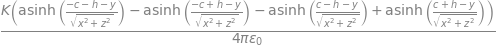

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
      

In [93]:
tol = 1e-12
sp.init_printing()

e = -1.60217662e-19 #unit C
K_val = 3.31 #unit e/nm - convert to coulombs per m? 
K_val_SI = (3.31*abs(e))/1e-9 #C/m
y_displacement = 1 #unit m
x_displacement = 0 #unit m
a_val = 1e-3 #unit m

x, y, z, K, eps_0, c, h = sp.symbols('x y z K epsilon_0 c h')
a, b = sp.symbols('a b')

c_val = a_val
h_val = -y_displacement

phi_pozzi = (K/(4*pi*eps_0))*((sp.asinh((c-(y-h))/sp.sqrt(x**2+z**2)))-(sp.asinh((-c-(y-h))/sp.sqrt(x**2+z**2)))+(sp.asinh((-c-(y+h))/sp.sqrt(x**2+z**2)))-(sp.asinh((c-(y+h))/sp.sqrt(x**2+z**2))))
display(phi_pozzi)

phi_pozzi_simple = phi_pozzi.subs({K:1, eps_0:1, pi:np.pi, c:0.5, h:-1})
phi_pozzi_lambda_simple = sp.lambdify([x, y, z], phi_pozzi_simple, 'numpy')

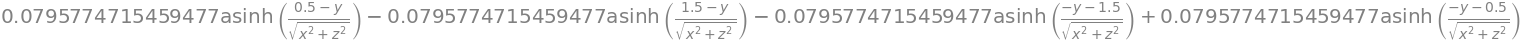

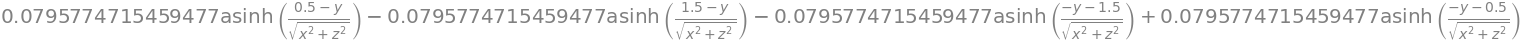

In [94]:

phi_latex = r"\frac{K}{4 \pi \epsilon_0}[\sinh ^{-1}\frac{c-(y-h)}{\sqrt{x^2+z^2}}-\sinh ^{-1}(\frac{-c-(y-h)}{\sqrt{x^2+z^2}})+\sinh ^{-1}(\frac{-c-(y+h)}{\sqrt{x^2+z^2}})-\sinh ^{-1}(\frac{c-(y+h)}{\sqrt{x^2+z^2}})]"
phi_latex_sympy = latex2sympy(phi_latex)
phi_latex_sympy_simple = phi_latex_sympy.subs({K:1, eps_0:1, pi:np.pi, c:0.5, h:-1})
phi_latex_sympy_lambda_simple = sp.lambdify([x, y, z], phi_latex_sympy_simple, 'numpy')
display(phi_latex_sympy_simple)
display(phi_pozzi_simple)


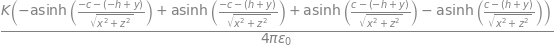

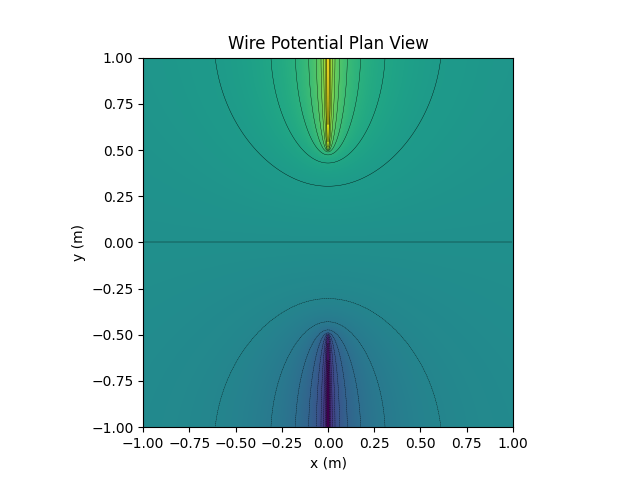

In [96]:
z_ = np.linspace(-1, 1, 1000)
plan_figure, plan_ax = plt.subplots()
x_line, xstep = np.linspace(-1, 1, 300, retstep = True)
y_line, ystep = np.linspace(-1, 1, 300, retstep = True)
x_grid, y_grid = np.meshgrid(x_line, y_line)
z_grid = 0*np.ones(x_grid.shape)

potential_image_pozzi = phi_pozzi_lambda_simple(x_grid, y_grid, 0)
plan_ax.imshow(potential_image_pozzi, extent=[-1, 1, -1, 1])
plan_ax.contour(potential_image_pozzi, 25, linewidths = 0.25, colors = 'k', extent = [-1, 1, -1, 1], origin = 'upper')
plan_ax.set_title('Wire Potential Plan View')
plan_ax.set_xlabel('x (m)')
plan_ax.set_ylabel('y (m)')

display(phi_latex_sympy)

In [97]:
phi_pozzi_lambda_simple(0,0,-1)

Text(0, 0.5, 'y (m)')

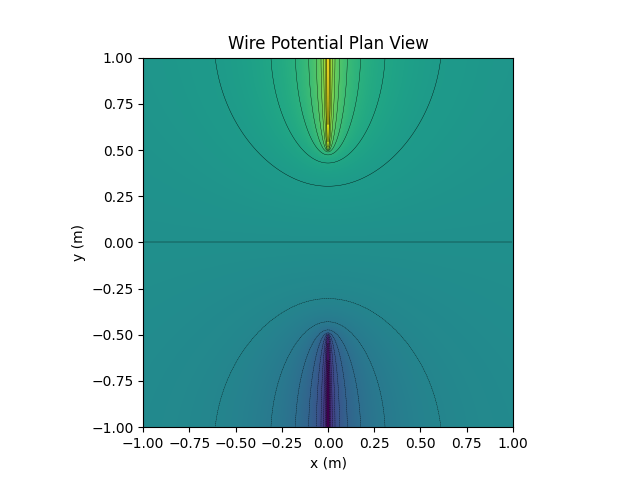

In [98]:
phi = (K/(4*pi*eps_0))*(sp.log((sp.sqrt(x**2+(y+a)**2 + z**2)+y+a)/(sp.sqrt(x**2+y**2+z**2)+y)))
    
#Substitute correct constants into the wire potential
phi = phi.subs({K:1, eps_0:1, pi:np.pi, a:1})
    
#Create the top and bottom wire
phi_top_wire = phi
phi_bottom_wire = phi.subs({x:-(x-0), y:-(y-y_displacement)})

#Make the first wire positively charged, and the second negatively charged
phi_wires = phi_top_wire - phi_bottom_wire

phi_wires_lambda = sp.lambdify([x, y, z], phi_wires, 'numpy')

plan_figure, plan_ax = plt.subplots()
x_line, xstep = np.linspace(-1, 1, 300, retstep = True)
y_line, ystep = np.linspace(-0.5, 1.5, 300, retstep = True)
x_grid, y_grid = np.meshgrid(x_line, y_line)
z_grid = 0*np.ones(x_grid.shape)

potential_image_janghyun = phi_wires_lambda(x_grid, y_grid, 0)
plan_ax.imshow(potential_image_janghyun, extent=[-1, 1, -1, 1])
plan_ax.contour(potential_image_janghyun, 25, linewidths = 0.25, colors = 'k', extent = [-1, 1, -1.0, 1.0], origin = 'upper')
plan_ax.set_title('Wire Potential Plan View')
plan_ax.set_xlabel('x (m)')
plan_ax.set_ylabel('y (m)')

In [99]:
np.allclose(potential_image_janghyun, potential_image_pozzi)

True